In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

URL = "http://www.stat.ufl.edu/~winner/data/pgalpga2008.dat"
df = pd.read_table(URL, delimiter=r"\s+", names=['avg_dist', 'accuracy', 'sex'])
df.describe()


,avg_dist,accuracy,sex
count,354.000000,354.000000,354.000000
mean,269.511582,65.239266,1.556497
std,22.196027,5.973796,0.497501
min,224.800000,49.000000,1.000000
25%,247.675000,61.125000,1.000000
50%,276.450000,65.600000,2.000000
75%,287.700000,69.475000,2.000000
max,315.100000,80.400000,2.000000


In [37]:
# Now consider a multiple regression on the full data set,
# including both female and male golfers. Modify the third 
# variable to be a 0 if the golfer is female and 1 if the 
# golfer is male and fit the following regression:
# y* = b0 + b1*x1 + b2*X2
import statsmodels.formula.api as sfm
mod = sfm.ols(formula='accuracy ~ avg_dist + df.sex==2', data = df) # regress acc onto dist
res=mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     98.24
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.31e-34
Time:                        11:11:57   Log-Likelihood:                -1055.9
No. Observations:                 354   AIC:                             2118.
Df Residuals:                     351   BIC:                             2129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             147.2689    

[]

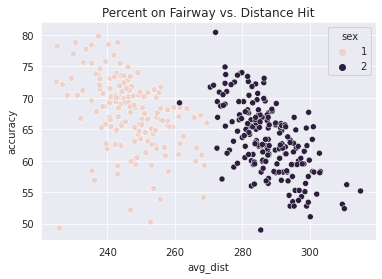

In [39]:
# PLOT
sns.set_style('darkgrid')
sns.scatterplot(x=df.avg_dist, y=df.accuracy, hue=df.sex)
plt.title('Percent on Fairway vs. Distance Hit')
plt.plot()


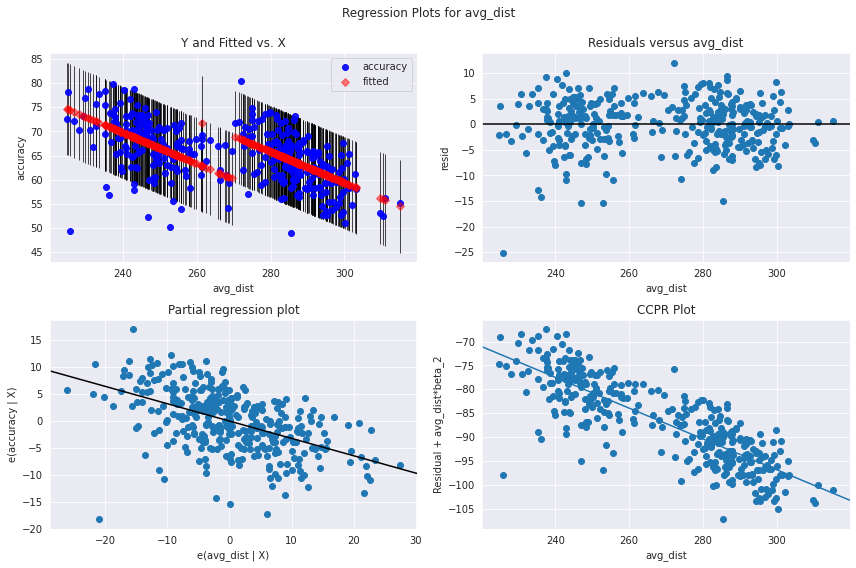

In [40]:
import statsmodels.api as sm
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'avg_dist', fig=fig)